**Assignment III - Advanced Econometrics**
2022-2023


Sven van Zoelen, Marte Ottesen, Jan Koolbergen

153767.80s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 20.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [16]:
### First we import the packages that we are going to use:
# You have to run this cell before any other, as they otherwise won't work
# If you get an error, the package is probably not installed
# You can then run 'conda install <package_name>' from the anaconda integrated terminal
# All these packages should be installed by default though

import numpy as np                  # Numpy is used for all kinds of mathematical stuff, especially related to matrices
import scipy.stats as sts           # SciPy is built specifically for statistical computing
import pandas as pd                 # Pandas is for reading in files and using dataframes
import matplotlib.pyplot as plt     # This package is used for the plotting framework, and can be used standalone
import seaborn as sns               # I use this package for nicer plots than the standard matplotlib plots

In [17]:
### First of all we read the data into a dataframe
raw_data = pd.read_csv("Assignment3_dataset.csv")

# Print the dataframe for a visual inspection
raw_data

,PERMNO,date,TICKER,RET
0,11308,2001/01/02,KO,-0.002051
1,11308,2001/01/03,KO,-0.025694
2,11308,2001/01/04,KO,-0.028481
3,11308,2001/01/05,KO,0.002172
4,11308,2001/01/08,KO,0.016251
...,...,...,...,...
21131,22752,2021/12/27,MRK,0.011092
21132,22752,2021/12/28,MRK,0.003134
21133,22752,2021/12/29,MRK,0.001823
21134,22752,2021/12/30,MRK,0.002469


In [88]:
### Now we want to divide the dataframe into seperate dataframes for each stock
# In order to not have to hardcode the ticker values, I use a dictionary comprehension:
data_dict = {stock: raw_data[raw_data.TICKER == stock] for stock in raw_data.TICKER.unique()}

# Now you can access the dataset using the name for example
print(data_dict['JNJ'])

# And more importantly, you can loop over the keys to apply a function to all datasets, which makes the assignment way easier
for stock in data_dict:
    mean = np.mean(data_dict[stock].RET)
    print(f"This is the mean return for stock {stock}: {mean:.6f}")
    
print("") # Just skipping a line
# Or even easier, loop through name and value at the same time:
for stock_name, stock_data in data_dict.items():
    mean = np.mean(stock_data.RET)
    print(f"This is the mean return for stock {stock_name}: {mean:.6f}")

       PERMNO        date TICKER       RET
10568   22111  2001/01/02    JNJ -0.029149
10569   22111  2001/01/03    JNJ -0.031863
10570   22111  2001/01/04    JNJ -0.021519
10571   22111  2001/01/05    JNJ  0.012937
10572   22111  2001/01/08    JNJ -0.001277
...       ...         ...    ...       ...
15847   22111  2021/12/27    JNJ  0.008440
15848   22111  2021/12/28    JNJ  0.004008
15849   22111  2021/12/29    JNJ  0.007044
15850   22111  2021/12/30    JNJ  0.004430
15851   22111  2021/12/31    JNJ -0.007196

[5284 rows x 4 columns]
This is the mean return for stock KO: 0.000312
This is the mean return for stock PFE: 0.000313
This is the mean return for stock JNJ: 0.000395
This is the mean return for stock MRK: 0.000261

This is the mean return for stock KO: 0.000312
This is the mean return for stock PFE: 0.000313
This is the mean return for stock JNJ: 0.000395
This is the mean return for stock MRK: 0.000261


In [19]:
### The above cell boils down to doing this:
KO_data     = raw_data[raw_data.TICKER == 'KO']
PFE_data    = raw_data[raw_data.TICKER == 'PFE']
JNJ_data    = raw_data[raw_data.TICKER == 'JNJ']
MRK_data    = raw_data[raw_data.TICKER == 'KO']

KO_mean     = np.mean(KO_data.RET)
PFE_mean    = np.mean(PFE_data.RET)
JNJ_mean    = np.mean(JNJ_data.RET)
MRK_mean    = np.mean(MRK_data.RET)

print(f"This is the mean return for stock KO: {KO_mean:.6f}")
print(f"This is the mean return for stock PFE: {PFE_mean:.6f}")
print(f"This is the mean return for stock JNJ: {JNJ_mean:.6f}")
print(f"This is the mean return for stock MRK: {MRK_mean:.6f}")



This is the mean return for stock KO: 0.000312
This is the mean return for stock PFE: 0.000313
This is the mean return for stock JNJ: 0.000395
This is the mean return for stock MRK: 0.000312


In [49]:
### Apply the pre-processing. Be careful to not run this function more than once, as it will scale the data with 100 every run.
# To reset the underlying data, just run the cell with the list comprehension again
for stock_name, stock_data in data_dict.items():
    mean_return = np.mean(stock_data.RET)
    stock_data.RET = stock_data.RET.transform(lambda ret: ret - mean_return)
    stock_data.RET = stock_data.RET.transform(lambda ret: ret * 100)

/var/folders/9m/qxm3c3hn1v1cjsk_phjxp9xc0000gn/T/ipykernel_85811/775003296.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.RET = stock_data.RET.transform(lambda ret: ret - mean_return)
/var/folders/9m/qxm3c3hn1v1cjsk_phjxp9xc0000gn/T/ipykernel_85811/775003296.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.RET = stock_data.RET.transform(lambda ret: ret * 100)


Question 1:

In [193]:
## Ignore this I'm just seeing what the dataset looks like fitted to the built in code for arch

from arch import arch_model
am = arch_model(raw_data.RET, mean = 'Zero', vol='Garch', p=1, o=0, q=1, dist='StudentsT')
tgarch1_1 = am.fit(update_freq=5, disp = "off")
print("tGARCH(1,1) model:", "\n", tgarch1_1.summary(), "\n")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001981. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


tGARCH(1,1) model: 
                           Zero Mean - GARCH Model Results                           
Dep. Variable:                          RET   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:                64713.6
Distribution:      Standardized Student's t   AIC:                          -129419.
Method:                  Maximum Likelihood   BIC:                          -129387.
                                              No. Observations:                21136
Date:                      Sun, Oct 09 2022   Df Residuals:                    21136
Time:                              16:10:08   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
------------------------------------------------------------

Nooow lets define our parameters:

In [232]:
## Define delta and lambda
lamda= [2, 5, 10, 50]
delta= [0, 1, 0.2, 0.4]


In [233]:
## Define parameters in the robust GARCH Model
n=len(stock_data)
omega=0
alpha=0.05
beta=0.9
sigmasq_last=1
x=stock_data.RET

In [234]:
## Attempt at simulating GARCH model
from statistics import variance


def simulate_GARCH(n, omega, alpha, beta, dist='StudentsT'):
    # Initialize the parameters
    white_noise = np.random.standard_t(size = n)
    resid = np.zeros_like(white_noise)
    variance = np.zeros_like(white_noise)
    
    for t in range(1, n):
        # Simulate the variance (sigma squared)
        variance[t] = omega + (alpha * x[t-1]**2 + dlt * x[t-1]**2) / (1 + (x[t-1]**2/lmd*sigmasq_last))+ beta * sigmasq_last
        # Simulate the residuals
        resid[t] = np.sqrt(variance[t]) * white_noise[t]    
    


In [237]:
## now I dont know what I'm doing but want to plot the model/variance

ni.garch = newsimpact(simulate_GARCH)
plt.plot(ni.garch)

NameError: name 'newsimpact' is not defined

Question 2:

In [199]:
### We first define a function to report the summary statistics for one stock
# We can then use a for loop to do this for every plot
def summary_statistics(stock_data):
    """This function takes in some stock data and reports some summary statistics."""
    returns = stock_data.RET # Just put this in a variable for convenience
    
    no_of_observations = len(returns)
    mean = np.mean(returns)
    
    # medians
    Q1 = np.percentile(returns, 25)
    Q2 = np.percentile(returns, 50)
    Q3 = np.percentile(returns, 75)
    
    standard_deviation = np.std(returns)
    skewness = sts.skew(returns)
    kurtosis = sts.kurtosis(returns)
    
    minimum = np.min(returns)
    maximum = np.max(returns)
    
    # Now we report the results:
    print(f"Number of observations: {no_of_observations}")
    print(f"Mean: {mean}")
    print(f"Q1: {Q1}")
    print(f"Q2: {Q2}")
    print(f"Q3: {Q3}")
    print(f"Standard deviation: {standard_deviation}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis {kurtosis}")
    print(f"Min: {minimum}")
    print(f"Max: {maximum}")


In [ ]:
### Call the function in a for loop
for stock_name, stock_data in data_dict.items():
    print(f"\nSummary statistics for stock {stock_name}:")
    summary_statistics(stock_data)

In [ ]:
### If necessary, we can also just call it on one dataset
summary_statistics(data_dict['JNJ'])

Text(0, 0.5, 'Returns MRK')

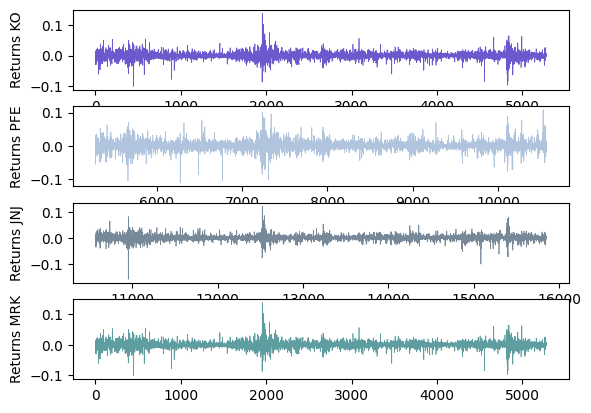

In [231]:
## Plot the returns 
from turtle import color

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
ax1.plot(KO_data.RET, linewidth=0.5, color='slateblue')
ax1.set_ylabel('Returns KO')
ax2.plot(PFE_data.RET, linewidth=0.5, color='lightsteelblue')
ax2.set_ylabel('Returns PFE')
ax3.plot(JNJ_data.RET, linewidth=0.5, color='lightslategrey')
ax3.set_ylabel('Returns JNJ')
ax4.plot(MRK_data.RET, linewidth=0.5, color='cadetblue')
ax4.set_ylabel('Returns MRK')


## Need to define x-axis as time period for each stock and use sharex=() to apply